# 动态雷达 —— 滚动相关性 (Rolling Correlation)

In [1]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.rcParams['axes.unicode_minus']=False

/Users/user/Documents/Fund_Auto_Bot/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
print('⚔️ 正在让 A股(证券) 与 美股(纳指) 进行历史对决...')
df_sec=ak.fund_open_fund_info_em(symbol='012363',indicator='单位净值走势')
df_sec['date'] =pd.to_datetime(df_sec['净值日期'])
df_sec['证券涨跌'] = pd.to_numeric(df_sec['单位净值']).pct_change()
df_sec=df_sec.set_index('date')['证券涨跌']
df_nas=ak.fund_open_fund_info_em(symbol='270042',indicator='单位净值走势')
df_nas['date']=pd.to_datetime(df_nas['净值日期'])
df_nas['纳指涨跌']=pd.to_numeric(df_nas['单位净值']).pct_change()
df_nas = df_nas.set_index('date')['纳指涨跌']
data = pd.concat([df_sec,df_nas],axis=1).dropna()
data.columns=['国泰证券','广发纳指']

⚔️ 正在让 A股(证券) 与 美股(纳指) 进行历史对决...


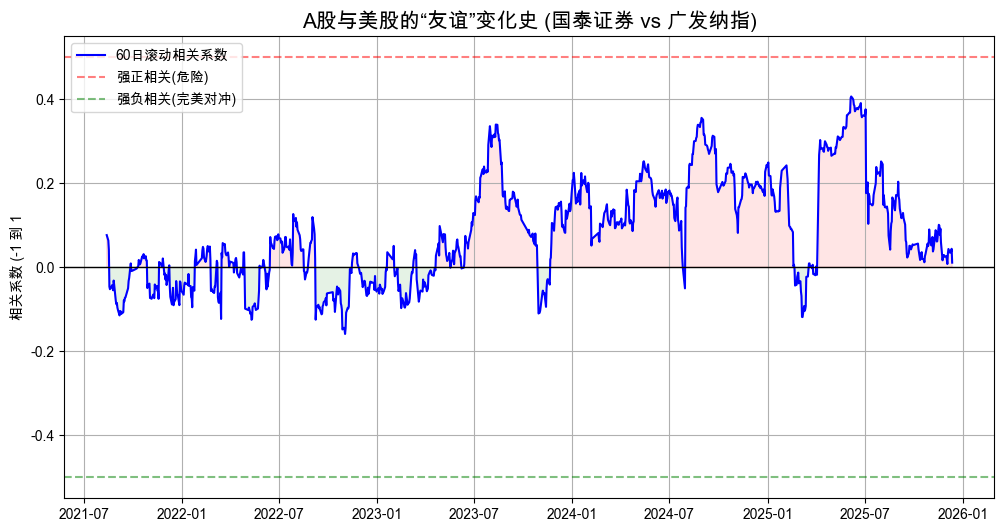

In [6]:
window=60
rolling_corr=data['国泰证券'].rolling(window=window).corr(data['广发纳指'])
plt.figure(figsize=(12,6))
plt.plot(rolling_corr,color='blue',linewidth=1.5,label=f'{window}日滚动相关系数')
plt.axhline(0,color='black',linestyle='-',linewidth=1)
plt.axhline(0.5,color='red',linestyle='--',alpha=0.5,label='强正相关(危险)')
plt.axhline(-0.5,color='green',linestyle='--',alpha=0.5,label='强负相关(完美对冲)')
plt.fill_between(rolling_corr.index,0,rolling_corr,where=(rolling_corr>0),color='red',alpha=0.1)
plt.fill_between(rolling_corr.index,0,rolling_corr,where=(rolling_corr<0),color='green',alpha=0.1)
plt.title('A股与美股的“友谊”变化史 (国泰证券 vs 广发纳指)',fontsize=15)
plt.ylabel('相关系数 (-1 到 1')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [7]:
current_corr=rolling_corr.iloc[-1]
print(f'📊 当前({window}天窗口) 它们的关系是:{current_corr:.4f} ')
if current_corr<0.1 and current_corr>-0.1:
    print('☁️ 结论：形同陌路。各走各的，对冲效果极好！')
elif current_corr>0.3:
    print('🔥 结论：狼狈为奸。全球同热，注意系统性风险！')
elif current_corr<-0.3:
    print('❄️ 结论：完美跷跷板。这边亏那边赚，非常舒服。')

📊 当前(60天窗口) 它们的关系是:0.0110 
☁️ 结论：形同陌路。各走各的，对冲效果极好！
